In [1]:
import pandas as pd
import researchpy as rp

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# These are for running the model and conducting model diagnostics
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
from pandas.core import datetools


from sklearn.model_selection import train_test_split


C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\gasoline.csv"

In [4]:
# load the training data 
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/insurance.csv")
    
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

Welcome to researchpy’s documentation!

researchpy produces Pandas DataFrames that contain relevant statistical testing information that is commonly required for academic research. The information is returned as Pandas DataFrames to make for quick and easy exporting of results to any format/method that works with the traditional Pandas DataFrame.

researchpy is essentially a wrapper that combines various established packages such as pandas, scipy.stats, and statsmodels to get all the standard required information in one method. If analyses were not available in these packages, code was developed to fill the gap.

researchpy is only compatible with Python 3.x. Download using either:

__pip install researchpy__

https://researchpy.readthedocs.io/en/latest/

In [7]:
# Let's get more information on the continuous varibles

rp.summary_cont(df[['charges','age', 'children']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,charges,1338.0,13270.422265,12110.011237,331.067454,12620.954034,13919.890496
1,age,1338.0,39.207025,14.049960,0.384102,38.453516,39.960534
2,children,1338.0,1.094918,1.205493,0.032956,1.030266,1.159569


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


There is a lot of variability in the variables charges, and a decent amount in age. 

let’s get some descriptives on the categorical variables.

In [9]:
rp.summary_cat(df[['sex', 'smoker', 'region']])

,Variable,Outcome,Count,Percent
0,sex,male,676,50.52
1,,female,662,49.48
2,smoker,no,1064,79.52
3,,yes,274,20.48
4,region,southeast,364,27.20
5,,southwest,325,24.29
6,,northwest,325,24.29
7,,northeast,324,24.22


- near even split of males and females, 
- majority are non-smokers, 
- there is a very close breakdown in region.

# Categorical to numeric conversion

In [10]:
df['sex'].replace({'female' : 1, 'male' : 0}, inplace= True)
df['smoker'].replace({'no': 0, 'yes': 1}, inplace= True)

In [11]:
df = pd.get_dummies(df)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


When using dummy variables, it is important to not include 1 of the dummy variables per original categorical variable. 

For example, since region had 4 possible categories, we will include 3 of those 4 in the model and the 4th category will still be captured in the model’s intercept.

In [12]:
# Statsmodel (linear regression)

model = smf.ols("charges ~ age + bmi + sex + smoker + children + region_northwest + region_southeast + region_southwest", data= df).fit()
    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:20:00   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.207e+04    999.649    -12.074      0.000    -1.4e+04   -1.01e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
sex                131.3144    332.945      0.394      0.693    -521.842     784.470
smoker            2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
children           475.5005    137.804      3.451      0.001     205.163     745.838
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         315.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Diagnosing Multicollinearity

In [13]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
region_northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
region_southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


There are no strong correlations between the IVs meaning there is no need to worry about multicollinearity.

# Diagnosing Normality

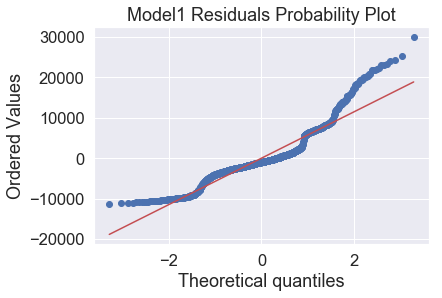

In [12]:
stats.probplot(model.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot");

the residuals which will be represented as dots (in blue) should fall on the red line. This plot indicates that the model’s residuals are __not normally distributed.__

In [13]:
# Kolmogorov-Smirnov test (for normality)
stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.6263077931301486, pvalue=0.0)

The test is significant which indicates that the model’s residuals are not normally distributed. REJECT the null hypothesis (that the residuals are normally distributed)

# Diagnosing Homoscedasticity

- Brown-Forsythe test, 
- Levene’s test, 
- Bruesch-Pagan test, or 
- Cook-Weisberg test

$H_0$ = Homoscedasticity is present, variance is same

$H_A$ = heteroscedasticity is present

> The test for homoscedasticity of variance needs to be conducted for each level of the categorical variables.

In [14]:
name = ['Lagrange multiplier statistic', 
        'p-value', 
        'f-value', 
        'f p-value']

test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(name, test)

[('Lagrange multiplier statistic', 121.74360137568986),
 ('p-value', 1.446717553918174e-22),
 ('f-value', 16.628612027375382),
 ('f p-value', 1.1456058246341032e-23)]

Tests are significant meaning the data violates the assumption of homoscedasticity, i.e. heteroscedasticity is present in the data

In [19]:
# for categorical variables

sex_variance_results = stats.levene(df['charges'][df['sex'] == 0], 
                                    df['charges'][df['sex'] == 1], center= 'median')

smoker_variance_results = stats.levene(df['charges'][df['smoker'] == 0],
                                       df['charges'][df['smoker'] == 1], center= 'median')

region_variance_results = stats.levene(df['charges'][df['region_northeast'] == 1],
                                       df['charges'][df['region_northwest'] == 1],
                                       df['charges'][df['region_southeast'] == 1],
                                       df['charges'][df['region_southwest'] == 1], center= 'median')

print(f"Sex Variance: {sex_variance_results}", "\n",
      f"Smoker Variance: {smoker_variance_results}", "\n",
      f"Region Variance: {region_variance_results}", "\n")

Sex Variance: LeveneResult(statistic=9.90925122305512, pvalue=0.0016808765833903443) 
 Smoker Variance: LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66) 
 Region Variance: LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703) 

